# **TECHCRUSH TASK 3**

**PIZZA PLACE SALES**

_Analyzing a year's worth of data to generate necessary insights_

In [3]:
import pandas as pd


In [8]:
import matplotlib.pyplot as plt

## **File Import & Merging**

In [7]:
# Importing the CSV files...
# using the folder name and a forward slash before the filename

order_details = pd.read_csv('pizza_sales/order_details.csv')
orders = pd.read_csv('pizza_sales/orders.csv')
pizzas = pd.read_csv('pizza_sales/pizzas.csv')

# Remember the special encoding for this one!
#this is done in case there are characters python might not be able to read

pizza_types = pd.read_csv('pizza_sales/pizza_types.csv', encoding='unicode_escape')

In [9]:
# Merging the tables
# making use of the merge function instead of the concat

df = pd.merge(order_details, orders, on='order_id')
df = pd.merge(df, pizzas, on='pizza_id')
df = pd.merge(df, pizza_types, on='pizza_type_id')

# Creating a calculated column (Revenue) to help with the analysis

df['revenue'] = df['quantity'] * df['price']

# Converting date/time to datetime objects

df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

## **Recommended Analysis**

#### 1. What is the Total Revenue?

In [10]:
total_revenue = df['revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


#### 2. Find the Total Quantity sold.

In [11]:
total_qty = df['quantity'].sum()
print(f"Total Quantity Sold: {total_qty:,}")

Total Quantity Sold: 49,574


#### 3. The Total Orders made

In [12]:
total_orders = df['order_id'].nunique()
print(f"Total Orders: {total_orders:,}")

Total Orders: 21,350


#### 4. How many Pizza types are sold?

In [13]:
num_types = df['pizza_type_id'].nunique()
print(f"Number of Pizza Types: {num_types}")

Number of Pizza Types: 32


#### 5. The average price of a pizza

In [14]:
avg_price = pizzas['price'].mean()
print(f"Average Pizza Price: ${avg_price:.2f}")

Average Pizza Price: $16.44


#### 6. The peak hours of Sales

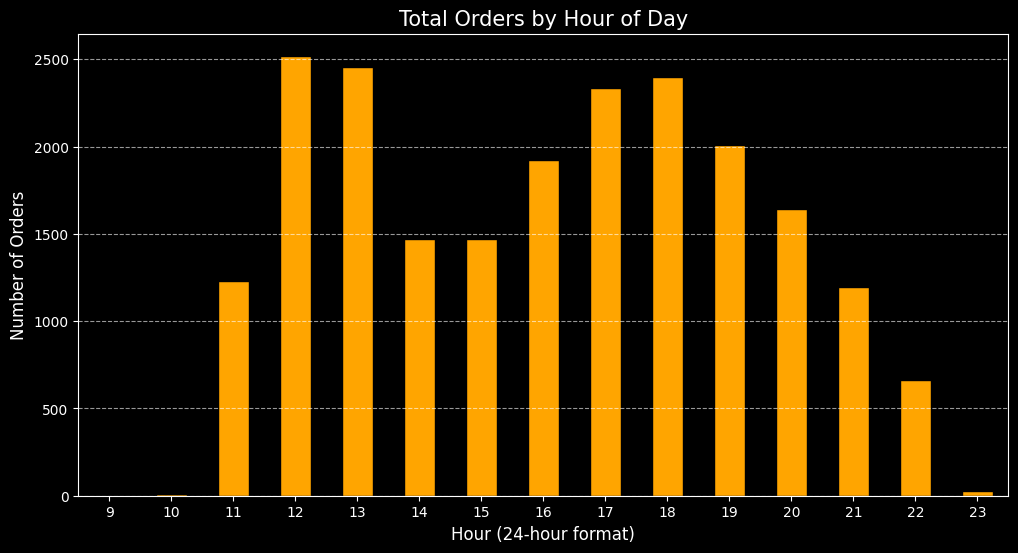

Top 5 Peak Hours:
hour
12    2520
13    2455
18    2399
17    2336
19    2009
Name: order_id, dtype: int64


In [16]:
import matplotlib.pyplot as plt

# To convert the time column to datetime format and extract the hour...
# I used .dt.hour to create a new column containing just the hour (0-23) for the 24-hour scale

df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# To count the number of unique orders per hour...
# I used nunique() because one order could have happening multiple times, have multiple rows (items)

hourly_orders = df.groupby('hour')['order_id'].nunique()


# Plot the results, determining the parameters to the visual

plt.figure(figsize=(12, 6))
hourly_orders.plot(kind='bar', color='orange', edgecolor='black')

# Adding labels and title
plt.title('Total Orders by Hour of Day', fontsize=15)
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the chart
plt.show()

# Print to show the top 5 peak hours per day

print("Top 5 Peak Hours:")
print(hourly_orders.sort_values(ascending=False).head(5))

The best selling hour of the day is 12 (12 O'clock noon), and other noon/evening hours.

#### 7. Total sales made on each day of the week.

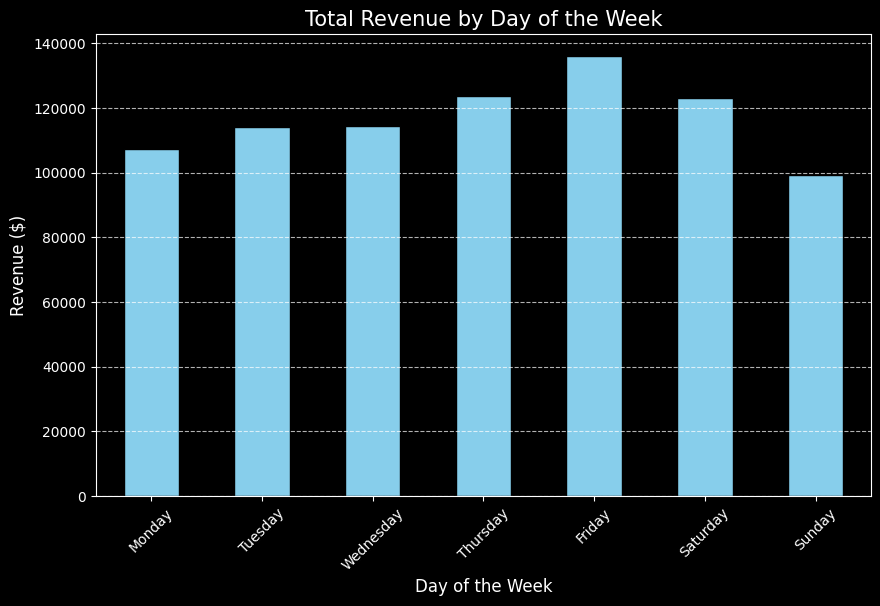

The day with the highest sales is Friday with $136,073.90


In [18]:
# Extract the day name from the date column

df['day_of_week'] = df['date'].dt.day_name()

# Group by day and sum the revenue
# I defined the daily order so the chart won't be alphabetical

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df.groupby('day_of_week')['revenue'].sum().reindex(day_order)


# Plot the results

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title to plot

plt.title('Total Revenue by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# To show the best selling day

best_day = sales_by_day.idxmax()
best_value = sales_by_day.max()

print(f"The day with the highest sales is {best_day} with ${best_value:,.2f}")

The plot also shows Thursday and Saturday also being top 3 best selling days. Meaning sales peak towards the end of the week.

#### 8. Top 5 Best Selling Pizzas.

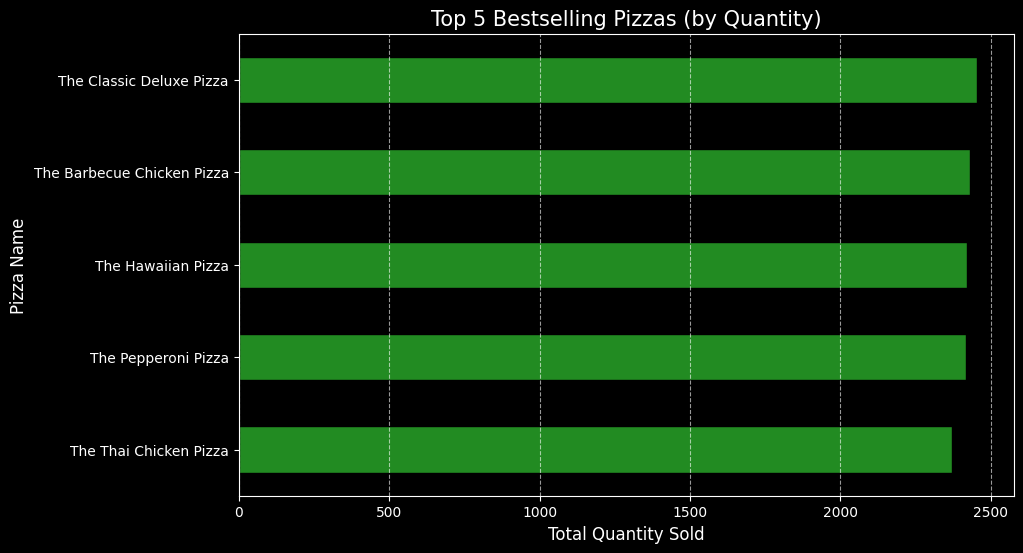

Top 5 Bestselling Pizzas:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


In [19]:
# I created a group by pizza name and sum the quantities
# I sorted by 'quantity' in descending order to get the highest at the top so i can get a rank

top_5_pizzas = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)


# Plot the results

plt.figure(figsize=(10, 6))
top_5_pizzas.sort_values(ascending=True).plot(kind='barh', color='forestgreen', edgecolor='black')

# Adding labels and title to plot

plt.title('Top 5 Bestselling Pizzas (by Quantity)', fontsize=15)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Pizza Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

# To show the actual numbers for the report

print("Top 5 Bestselling Pizzas:")
print(top_5_pizzas)

#### 9. Sales by month.

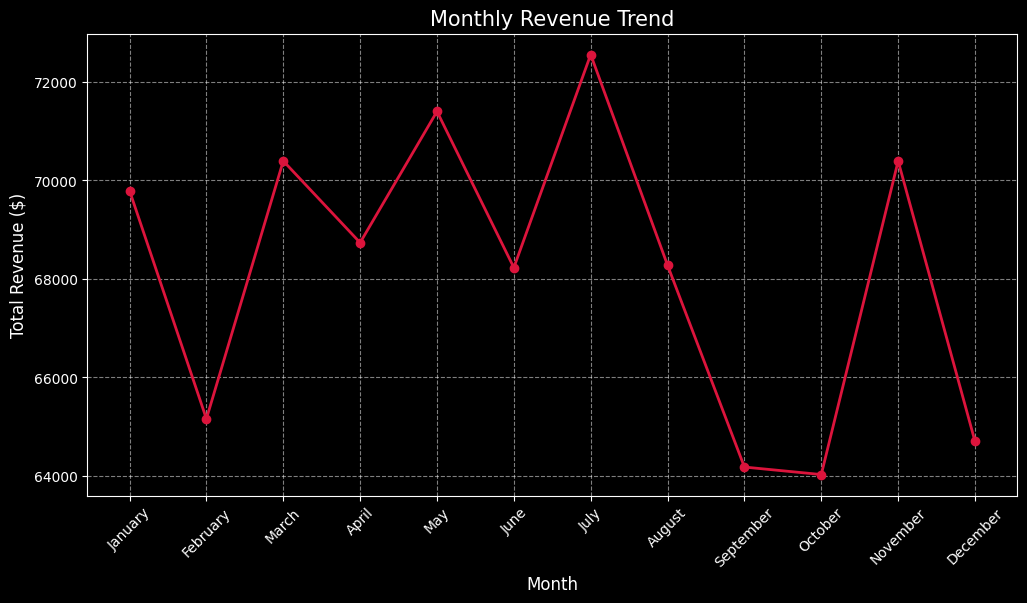

Monthly Revenue Breakdown:
month
January      $69,793.30
February     $65,159.60
March        $70,397.10
April        $68,736.80
May          $71,402.75
June         $68,230.20
July         $72,557.90
August       $68,278.25
September    $64,180.05
October      $64,027.60
November     $70,395.35
December     $64,701.15
Name: revenue, dtype: str


In [20]:
# To extract the month name from the date...
# I used month_name() to get "January", "February", etc.

df['month'] = df['date'].dt.month_name()

# I had to define the month order (so it won't be alphabetical)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# I created  the group by month and sum the revenue, then reindexed to the calendar order above

monthly_sales = df.groupby('month')['revenue'].sum().reindex(month_order)


# Plot the results as a line chart (best for showing trends)

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='crimson', linewidth=2)

# Labels and title
plt.title('Monthly Revenue Trend', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(range(len(month_order)), month_order, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# To show the data derived...

print("Monthly Revenue Breakdown:")
print(monthly_sales.apply(lambda x: f"${x:,.2f}"))

Throughout the year, the amount of sales made fluctuates, dipping one month and rising afterwards but there is a noticeable dip from the monht of July to the month of September (the summer period).

I would advise the introduction of promotions targeted towards summer period.

#### 10. Worst performing Pizza types

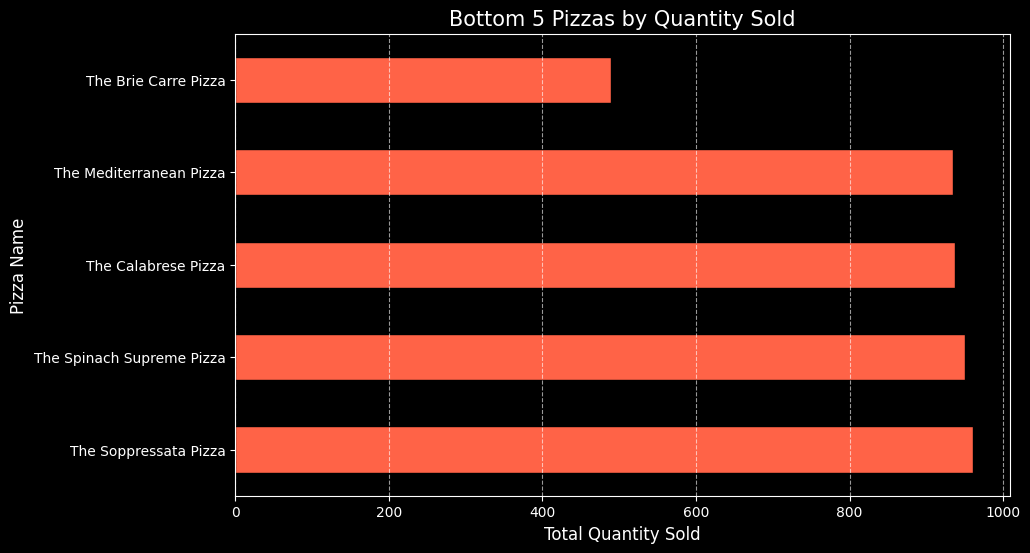

Bottom 5 Underperforming Pizzas:
name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


In [21]:
# Group by pizza name and sum the quantities...
# I sorted in ascending order (True) to show the lowest sales at the top

bottom_5_pizzas = df.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5)


# Plot the results

plt.figure(figsize=(10, 6))
bottom_5_pizzas.sort_values(ascending=False).plot(kind='barh', color='tomato', edgecolor='black')

# Plot labels and title

plt.title('Bottom 5 Pizzas by Quantity Sold', fontsize=15)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Pizza Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

# Print the actual numbers

print("Bottom 5 Underperforming Pizzas:")
print(bottom_5_pizzas)

The worst performing pizza by a large difference is The Brie Carre Pizza. I would suggest the ingredients used should be re-considered and maybe even the branding of the pizza changed completely.